## **Installation**

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()


✨🍰✨ Everything looks OK!


In [2]:
!conda create -n SDAL python=3.10 -y
!source /usr/local/etc/profile.d/conda.sh && conda activate SDAL

!conda install -c conda-forge root=6.28.10 -y

import os
os.environ["PATH"] = "/usr/local/envs/SDAL/bin:" + os.environ["PATH"]
os.environ["PYTHONPATH"] = "/usr/local/envs/SDAL/lib/python3.10/site-packages"



Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/SDAL

  added / updated specs:
    - python=3.10


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    ld_impl_linux-64-2.43      |       h712a8e2_4         656 KB  conda-forge
    libexpat-2.7.0             |       h5888daf_0          73 KB  conda-forge
    libffi-3.4.6               |       h2dba641_1          56 KB  conda-forge
    libgcc-14.2.0              |       h767d61c_2         828 KB  conda-forge
    libgcc-ng-14.2.0           |       h69a702a_2          52 KB  conda-forge
    lib

## Download Files

In [3]:
# Step 1: Download the ROOT file

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1y_77NX9GYE_6jwobGjcXj-cizYR75CrD' -O phiKK.root


--2025-04-11 07:03:23--  https://docs.google.com/uc?export=download&id=1y_77NX9GYE_6jwobGjcXj-cizYR75CrD
Resolving docs.google.com (docs.google.com)... 173.194.202.139, 173.194.202.102, 173.194.202.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.202.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1y_77NX9GYE_6jwobGjcXj-cizYR75CrD&export=download [following]
--2025-04-11 07:03:23--  https://drive.usercontent.google.com/download?id=1y_77NX9GYE_6jwobGjcXj-cizYR75CrD&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.20.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4954947 (4.7M) [application/octet-stream]
Saving to: ‘phiKK.root’

phiKK.root          100%[===================>]   4.72M  26.3MB/s    in 

## Create Folders

**Setup: Choose working mode**

Select the appropriate mode by setting the `MODE` variable in the next cell.

- `"temp"`: Use Colab's temporary storage (`/content`).  
  This does **not require Google Drive**.  
  All `.root` files must already be in `/content/` (e.g., uploaded or downloaded there).  
  These files will be moved into a subfolder (`content/exercise_5`) for processing.  
  **Important:** All data in `/content/` is deleted when the Colab session ends.

- `"drive_cp"`: Use Google Drive and copy all `.root` files from `/content/` into your Drive.  
  This creates two folders under `Colab Notebooks`:  
  - `exercise_6/` for data  
  - `Plots/` for outputs  
  Recommended for first-time setup.

- `"drive_use"`: Use Google Drive assuming the `.root` files are **already** in your Drive.  
  Use this mode to resume work without copying files again.

---


In [4]:
# MODE options:
# "temp":      use temporary /content space, move .root files to temp data_dir
# "drive_cp":  use Google Drive, copy .root files into Drive
# "drive_use": use Google Drive, assume files already exist there

MODE = "temp"  # ← change to "drive_cp" or "drive_use" if needed

import os
if MODE.startswith("drive_cp"):
    from google.colab import drive
    drive.mount('/content/drive')
    base = "/content/drive/My Drive/Colab Notebooks"
    data_dir = f"{base}/exercise_6/"
    plot_dir = f"{base}/Plots"
else:
    data_dir = "/content/exercise_6/"
    plot_dir = "/content/Plots"

os.makedirs(data_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

if MODE == "drive_cp":
    !cp *.root "$data_dir"
elif MODE == "temp":
    !cp *.root "$data_dir"

if not os.listdir(data_dir):
    raise RuntimeError("No ROOT files found.")


In [5]:
import ROOT
from ROOT import gROOT, gStyle, TCanvas, TFile, TH1D, RooRealVar, RooDataHist, RooFit, TObject,RooArgSet, RooCBShape
from ROOT import RooPlot, RooGaussian, RooChebychev, RooAddPdf, RooArgList, kRed, kGreen, kDashed, kBlue, gPad, TLine
from ROOT import RooVoigtian, kFALSE, kTRUE

Welcome to JupyROOT 6.28/10


## Open ROOT file

In [6]:
f1 = ROOT.TFile(f"{data_dir}phiKK.root", "READ") #open only in READ mode
f1.ls()

TFile**		/content/exercise_6/phiKK.root	
 TFile*		/content/exercise_6/phiKK.root	
  KEY: TH1F	Xcand_histo_all_all_all_all;1	Xcand_histo_all_all_all_all
  KEY: TH1F	JPsi_histo_all_all_all_all;1	JPsi_histo_all_all_all_all
  KEY: TH1F	Phi_hist_all_all_all_all;1	Phi_hist_all_all_all_all
  KEY: TH1F	JPsi_histo_original_all_all_all_all;1	JPsi_histo_original_all_all_all_all
  KEY: TH1F	Xcand_histo_signal_all_all_all_all;1	Xcand_histo_signal_all_all_all_all
  KEY: TH1F	Xcand_histo_r_side_all_all_all_all;1	Xcand_histo_r_side_all_all_all_all
  KEY: TH1F	Xcand_histo_l_side_all_all_all_all;1	Xcand_histo_l_side_all_all_all_all
  KEY: TH1F	Xcand_histo_all_all_all_muons;1	Xcand_histo_all_all_all_muons
  KEY: TH1F	JPsi_histo_all_all_all_muons;1	JPsi_histo_all_all_all_muons
  KEY: TH1F	Phi_hist_all_all_all_muons;1	Phi_hist_all_all_all_muons
  KEY: TH1F	JPsi_histo_original_all_all_all_muons;1	JPsi_histo_original_all_all_all_muons
  KEY: TH1F	Xcand_histo_signal_all_all_all_muons;1	Xcand_histo_signal_all_

In [11]:
# Set style for plots
gROOT.ForceStyle()
gStyle.SetTitleOffset(1.4, 'Y')
gStyle.SetOptFit(1)

# Open ROOT file and get histogram
hPhiKK = f1.Get("CW_PhiMass_NoM")

#myC = TCanvas("myC", "PhiMassPlot", 1100, 800)
xMin = hPhiKK.GetXaxis().GetXmin()
xMax = hPhiKK.GetXaxis().GetXmax()

nBins = hPhiKK.GetNbinsX()
print(nBins)
#xVar = RooRealVar("xVar", "m(K^{+}K^{-}) [GeV/c^{2}]", xMin, xMax)
#xVar = RooRealVar("xVar", "m(K^{+}K^{-}) [GeV/c^{2}]", 0.987, 1.0645)
xVar = RooRealVar("xVar", "m(K^{+}K^{-}) [GeV/c^{2}]", 0.99, 1.0645)
#xVar.setBins((nBins/10)*0.2)
num_bins = int((nBins / 10) * 0.2)
#xVar.setBins(int((nBins / 10) * 0.2))
xVar.setBins(num_bins)
print(num_bins)
KKHist = RooDataHist("KK_hist", hPhiKK.GetTitle(), RooArgSet(xVar), ROOT.RooFit.Import(hPhiKK, False))




2000
40


In [12]:
hPhiKK.GetEntries()

346685.0

In [13]:
#Configure and Make Fit
#
#---SIGNAL --> modelled with a Voigtian
mean = RooRealVar("mean", "mean of voigtian", 1.0197, 1.019, 1.0205)
gamma = RooRealVar("gamma", "width of BW", 0.0045, 0.001, 0.01)
sigma = RooRealVar("#sigma", "mass resolution", 0.0013) #to set at the MC value of 1.3 MeV
sigPDF = RooVoigtian("sigPDF", "sigPDF", xVar, mean, gamma, sigma)

#
#-----BKG --> modelled with a Chebyshev Polynomial
c0 = RooRealVar("c_{0}", "c0", 0.001, -15, 15)
c1 = RooRealVar("c_{1}", "c1", -0.1, -15, 15)
c2 = RooRealVar("c_{2}", "c2", -0.1, -15, 15)
c3 = RooRealVar("c_{3}", "c3", 0.1, -10, 10)
c4 = RooRealVar("c_{4}", "c4", 0.1, -10, 10)
c5 = RooRealVar("c_{5}", "c5", 0.05, -10, 10)
c6 = RooRealVar("c_{6}", "c6", 0.0, -1, 1)
bkgPDF = RooChebychev("bkgPDF", "bkgPDF", xVar, RooArgSet(c0, c1, c2, c3, c4, c5)) #(*)

# alternatively ...
a0 = RooRealVar("a_{0}", "a0", 0.001, -1., 1.)
a1 = RooRealVar("a_{1}", "a1", 0.001, -0.5, 0.5)
a2 = RooRealVar("a_{2}", "a2", -0.0001, -2., 2.)
a3 = RooRealVar("a_{3}", "a3", 0.0)
a4 = RooRealVar("a_{4}", "a4", 0.0, -0.1, 0.1)
a5 = RooRealVar("a_{5}", "a5", 0.0, -0.025, 0.05)
a6 = RooRealVar("a_{6}", "a6", 0.0, -0.001, 0.001)
#bkgPDF = RooChebychev("bkgPDF", "bkgPDF", xVar, RooArgSet(a0,a1,a2,a3,a4,a5,a6))  #bit worse than (*)

# -- Yield parameters
nSig = RooRealVar("nSig", "Number of signal candidates", 5e+5, 1000., 5e+6)
nBkg = RooRealVar("nBkg", "Bkg component", 2e+6, 1000., 5e+7)

# -- Combine signal and background models
totalPDF = RooAddPdf("totalPDF", "totalPDF", RooArgList(sigPDF, bkgPDF), RooArgList(nSig, nBkg)) #fitting model

#xVar.setRange("fitRange", xyz, abc) # we could set a fit range if we need

#totalPDF.fitTo(KKHist, ROOT.RooFit.Extended(kFALSE)) # the fit is by default Extended due to the way the pdf is implemented
#totalPDF.fitTo(KKHist, ROOT.RooFit.Extended(kTRUE), ROOT.RooFit.MaxCalls(10000))  # as in previous exercise
fit_result = totalPDF.fitTo(KKHist,RooFit.Extended(kTRUE),RooFit.MaxCalls(10000),RooFit.Save())

chi2_obj = totalPDF.createChi2(KKHist)
chi2_val = chi2_obj.getVal()
npar = fit_result.floatParsFinal().getSize()
ndof = KKHist.numEntries() - npar
chi2_ndf = chi2_val / ndof


[#1] INFO:NumericIntegration -- RooRealIntegral::init(sigPDF_Int[xVar]) using numeric integrator RooIntegrator1D to calculate Int(xVar)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(sigPDF_Int[xVar]) using numeric integrator RooIntegrator1D to calculate Int(xVar)
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sigPDF,bkgPDF)
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c_{0}        1.00000e-03  3.00000e+00   -1.50000e+01  1.50000e+01
     2 c_{1}       -1.00000e-01  3.00000e+00   -1.50000e+01  1.50000e+01
     3 c_{2}       -1.00000e-01  3.00000e+00   -1.50000e+01  1.50000e+01
     4 c_{3}        1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     5 c_{4}        1.00000e-01  2.00000e+00   

[#1] INFO:NumericIntegration -- RooRealIntegral::init(sigPDF_Int[xVar]) using numeric integrator RooIntegrator1D to calculate Int(xVar)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(totalPDF) directly selected PDF components: (sigPDF)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(totalPDF) indirectly selected PDF components: ()
[#1] INFO:NumericIntegration -- RooRealIntegral::init(sigPDF_Int[xVar]) using numeric integrator RooIntegrator1D to calculate Int(xVar)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(totalPDF) directly selected PDF components: (bkgPDF)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(totalPDF) indirectly selected PDF components: ()
[#1] INFO:NumericIntegration -- RooRealIntegral::init(sigPDF_Int[xVar]) using numeric integrator RooIntegrator1D to calculate Int(xVar)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(sigPDF_Int[xVar]) using numeric integrator RooIntegrator1D to calculate Int(xVar)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myC
Info in <TCanvas::Print>: png file /content/PlotsPhiKK_Voigtian.png has been created


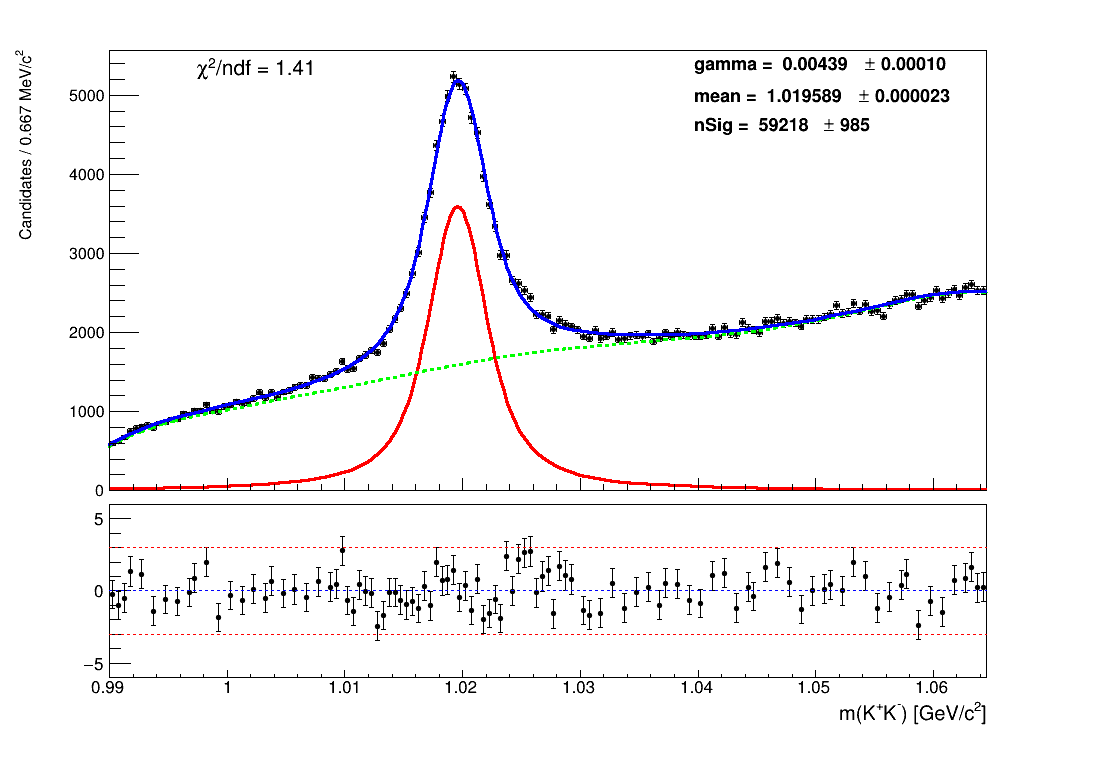

In [14]:
myC = TCanvas("myC", "PhiMassPlot", 1100, 800)

xframe = xVar.frame()
#xframe.SetTitle(hPhiKK.GetTitle())

xframe.SetTitle(" ")
xframe.SetYTitle("Candidates / 0.667 MeV/c^{2}")
#xframe.SetTitleOffset(1.45, "Y")

gStyle.SetMarkerSize(0.65)
gStyle.SetMarkerStyle(20)
KKHist.plotOn(xframe)
totalPDF.plotOn(xframe)

totalPDF.plotOn(xframe, RooFit.Components(ROOT.RooArgSet(sigPDF)), RooFit.LineColor(ROOT.kRed))
totalPDF.plotOn(xframe, RooFit.Components(ROOT.RooArgSet(bkgPDF)), RooFit.LineColor(ROOT.kGreen), RooFit.LineStyle(ROOT.kDashed))
totalPDF.paramOn(xframe, RooFit.Parameters(ROOT.RooArgSet(mean, sigma, gamma, nSig)), RooFit.Layout(0.62, 0.9, 0.9))

totalPDF.plotOn(xframe)

#myC.cd()
#xframe.Draw()

#add the pulls bin-by-bin instead:

framePull = xVar.frame()
framePull.SetTitle(" ")

pulls1 = xframe.pullHist()
framePull.addObject(pulls1, "P")
framePull.SetMinimum(-6)
framePull.SetMaximum(6)

myC.Divide(0,2)
myC.cd(2)
ROOT.gPad.SetPad(0.0, 0.0, 1.0, 0.35)
ROOT.gPad.SetBottomMargin(0.35)
ROOT.gPad.SetTopMargin(0.01)

framePull.GetXaxis().SetLabelSize(0.07)
framePull.GetYaxis().SetLabelSize(0.07)
framePull.GetXaxis().SetTitleSize(0.08)
framePull.GetYaxis().SetTitleSize(0.08)
framePull.GetYaxis().SetNdivisions(505)

framePull.Draw()

line = ROOT.TLine(0.99, 0., 1.0645, 0.)
line.SetLineColor(ROOT.kBlue)
line.SetLineStyle(ROOT.kDashed)
line.Draw("same")

line_up = ROOT.TLine(0.99, 3., 1.0645, 3.)
line_up.SetLineColor(2)
line_up.SetLineStyle(ROOT.kDashed)
line_up.Draw("same")

line_down = ROOT.TLine(0.99, -3., 1.0645, -3.)
line_down.SetLineColor(2)
line_down.SetLineStyle(ROOT.kDashed)
line_down.Draw("same")

myC.cd(1)
ROOT.gPad.SetPad(0.0, 0.35, 1.0, 1.0)
ROOT.gPad.SetBottomMargin(0.022)
xframe.GetXaxis().SetLabelSize(0)
xframe.GetXaxis().SetTitleSize(0)
xframe.Draw()

latex_chi2 = ROOT.TLatex()
latex_chi2.SetNDC()
latex_chi2.SetTextSize(0.045)
latex_chi2.SetTextFont(42)
latex_chi2.DrawLatex(0.18, 0.85, f"#chi^{{2}}/ndf = {chi2_ndf:.2f}")

myC.Draw()
myC.SaveAs(f"{plot_dir}PhiKK_Voigtian.png")
#myC.Clear()

In [15]:
myC.Clear()